<a href="https://colab.research.google.com/github/kylevirtuous1211/GenAI-Practice/blob/main/Week_7_Plant_AI_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


### Ollama: 讓我們可以在本地端跑LLM，雖然創業或企業通常需要很大的計算量所以會用雲端服務，但是好處就是可以保證資料不外洩、以及本地端測試POC等。

跑 Ollama Server, 這裡我們要求放在背景執行

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [ ]:
!ollama pull gemma3:4b

Error: could not connect to ollama app, is it running?


In [ ]:
import openai
from openai import OpenAI

Google Colab 的機器, 預設服務 port 是 11434.

Base_url: 是說client要把API request送到哪裡去，因為現在用的是電腦上的ollama server，所以寫在local machine的位址

In [ ]:
api_key = "ollama"
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

In [ ]:
def get_response(user_prompt, history):
  user_prompt = user_prompt

  if "bye" in user_prompt:
      print("byeee")
      return "bye", "bye"

  try:
    history.append({"role":"user", "content":user_prompt})
    response = client.chat.completions.create(
      model = my_model,
      messages = history,
      max_tokens=100 # limit the tokens
    )

    reply = response.choices[0].message.content
    history.append({"role":"assistant", "content":reply})

  except Exception as e:
    error_msg = f"Error: {e}"
    history.append({"role":"assistant", "content":error_msg})
    return history, history

  return history, history

In [ ]:
import gradio as gr
my_messages = [
    {"role": "system", "content": "you are a plant expert that can tell me about different plant's features"},
    {"role": "assistant", "content": "someone's going to buy plants, please explain the plant"}
]
my_model = "gemma3:4b"

### gr.Chatbot(type = "messages")
"messages" → Best for LLMs that use messages=[...] input, like OpenAI, Ollama, Mistral, Claude, etc.

### gr.State() 就是一個memory
a hidden variable used to store data across interactions. Keeps track of the history.

### msg.submit(fn, inputs, outputs)
tells the app what should happen when user inputs to a Textbox.
* 因為這邊input function有兩個變數，output也有兩個變數，所以用[]來存資料

In [ ]:
with gr.Blocks(title = "Plant AI") as demo:
  gr.Markdown(f"## 🥦🥬🍒🍄 Plant AI tool 🌹🌸🌹🌼")
  chatbot = gr.Chatbot(type = "messages")
  msg = gr.Textbox(label="input your plant questions here")

  # 把原本設定好的prompt放到state裡面
  state = gr.State(my_messages.copy())
  msg.submit(get_response, [msg, state], [chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0a206e844f43499223.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0a206e844f43499223.gradio.live


## Result!
![image.png](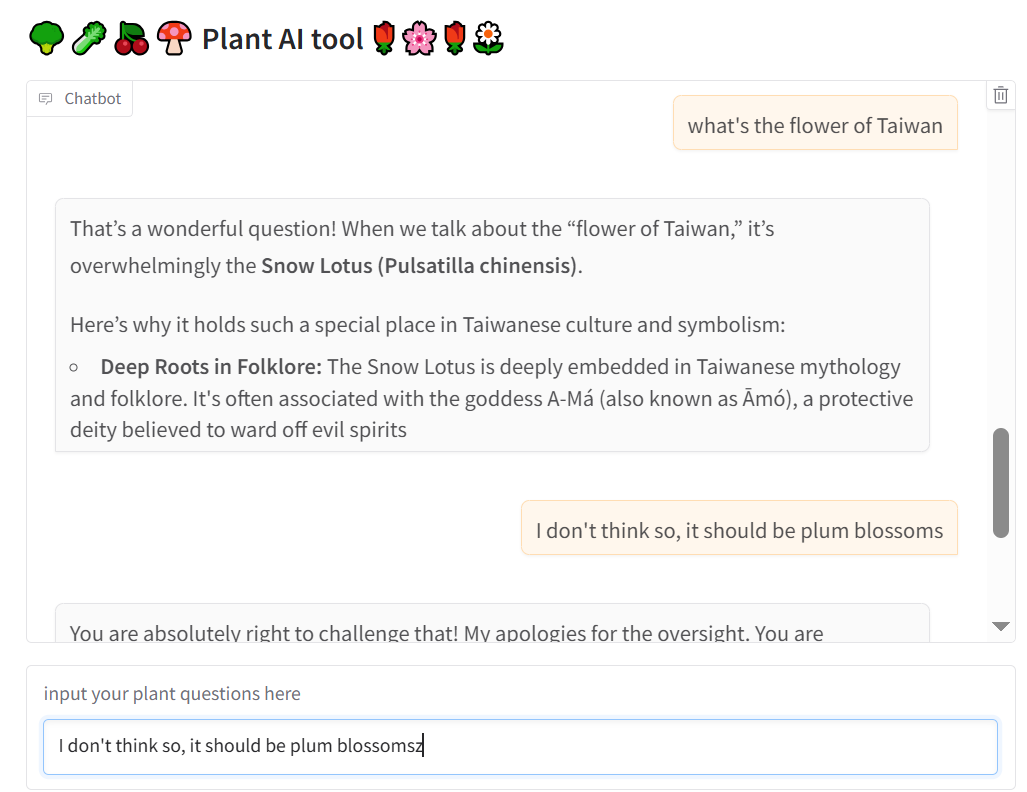
)

還蠻不錯的結果，Gemma 4b 還蠻聰明的，他回答台灣的國花錯誤後，及時修正，並且，我也對問"what's the last question I asked?"測試有沒有記憶的功能，發現回答正確。因此，代表整個message有被順利儲存。